# **A General Form of ODEs and the Exponential Problem Test**
In this week’s session, we dive into the general formulation of ordinary differential equations (ODEs) and their applications in classical mechanics.

General Form of an Ordinary Differential Equation (ODE)

An $n$-th order ordinary differential equation has the general form:

$$
F\left(t, y, \frac{dy}{dt}, \frac{d^2y}{dt^2}, \dots, \frac{d^n y}{dt^n} \right) = 0
$$

If the equation can be solved for the highest derivative $\frac{d^n y}{dt^n}$, then it is said to be in explicit form:

$$
\frac{d^n y}{dt^n} = f\left(t, y, \frac{dy}{dt}, \frac{d^2y}{dt^2}, \dots, \frac{d^{n-1} y}{dt^{n-1}} \right)
$$

A first-order ODE (most common in numerical applications) has the simpler form:

$$
\frac{dy}{dt} = f(t, y)
$$

This form is particularly useful for numerical integration methods like Euler, Runge-Kutta, and Verlet, and it can be extended to systems of equations by treating $y$ as a vector.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## The exponential problem, dx/dt = x:



In [11]:
def rhs_exp(x):
    """
    Function to evaluate the right hand side of the exponential ODE
    dx/dt = x
    
    Parameters:
    x - the current value of the dependent variable
    
    Returns:
    rhs - the value of the RHS
    """
    return x

It numerically solves the ordinary differential equation (ODE)

$$
\frac{dx}{dt} = x
$$

with initial condition:

$$
x(0) = 1
$$

This is a classic exponential growth problem, and its exact solution is:

$$
x(t) = e^t
$$

The code uses Euler’s method to approximate the solution from $t = 0$ to $t = 1$.

Euler’s method approximates the solution using the formula:

$$
x_{n+1} = x_n + \tau \cdot f(x_n)
$$

In this case, since $f(x) = x$, the update becomes:

$$
x_{n+1} = x_n + \tau x_n = x_n (1 + \tau)
$$

The time step $\tau$ is:

In [12]:
# Integrate dx/dt = x using Euler's method

# Number of steps and time step
numSteps = 10
tau = 1/numSteps

# Initial values
t = 0
x = 1

# Show values of independent and dependent variables
print("\n      t       x")
print(f"{t:7.5g} {x:7.5g}")

#-------------------------------------------------------------------------------
# Euler's method integration
for n in range(0, numSteps):

    # One step of Euler:
    # rhs_exp(x) = x.
    f = rhs_exp(x)
    x = x + tau*f
    t = t + tau

    # Show values of independent and dependent variables:
    print(f"{t:7.5g} {x:7.5g}")

#-------------------------------------------------------------------------------
# Display percentage error:
print("Error: %g%%" % (100*abs(x-np.exp(1))/np.exp(1)))



      t       x
      0       1
    0.1     1.1
    0.2    1.21
    0.3   1.331
    0.4  1.4641
    0.5  1.6105
    0.6  1.7716
    0.7  1.9487
    0.8  2.1436
    0.9  2.3579
      1  2.5937
Error: 4.58155%


 ## **Integrating $\frac{dx}{dt} = x$ using RK4**



The RK4 Model

The Runge-Kutta method is a smart way of updating the value of $x$ from one time step to the next by using multiple estimates of the slope (or derivative) within each interval.

Given a general ODE:

$$
\frac{dx}{dt} = f(x,t)
$$

Think of it like this:

**Instead of taking just one guess for the slope (like Euler does), RK4 takes four smart guesses and combines them in a weighted average. This gives you a much better prediction of how $x$ evolves over time.**


Suppose you’re at time $t_n$ with a known value $x_n$.
1.	First guess (start of the interval):
$$
k_1 = f(x_n, t_n)
$$
2.	Second guess (halfway, using $k_1$):
$$
k_2 = f\left(x_n + \frac{\tau}{2} k_1, t_n + \frac{\tau}{2}\right)
$$
3.	Third guess (again halfway, but using $k_2$):
$$
k_3 = f\left(x_n + \frac{\tau}{2} k_2, t_n + \frac{\tau}{2}\right)
$$
4.	Fourth guess (end of the interval):
$$
k_4 = f\left(x_n + \tau k_3, t_n + \tau\right)
$$

Finally, you update the solution:

$$
x_{n+1} = x_n + \frac{\tau}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$



The RK4 method combines several slope estimates:

•	$k_1$ is the slope at the beginning (underestimates the curvature).

•	$k_2$ and $k_3$ sample in the middle of the interval — these are more reliable.

•	$k_4$ is the slope at the end (may overestimate the curvature).

By weighting the middle slopes ($k_2$ and $k_3$) twice as much, RK4 effectively balances over- and underestimates of the true solution and cancels out lower-order error terms.

# **Implicit evaluation of t**


In the general Runge-Kutta method, the function $f$ may depend explicitly on both the current state $x$ and time $t$. This is written as:

$$
\frac{dx}{dt} = f(x, t)
$$

However, in many physical systems — like undamped or even damped pendulums — the equations are autonomous, meaning they depend only on the state and not explicitly on time:

$$
\frac{dx}{dt} = f(x)
$$

In these cases, $t$ doesn’t influence the right-hand side directly, so we can omit it safely from the implementation. You still advance time $t$ internally during the loop, but it doesn’t affect the dynamics.

You can simplify the equations into:

$$
k_1 = f(x_n)
$$
2.	Second guess (halfway, using $k_1$):
$$
k_2 = f(x_n + \frac{\tau}{2} k_1)
$$
3.	Third guess (again halfway, but using $k_2$):
$$
k_3 = f(x_n + \frac{\tau}{2} k_2)
$$
4.	Fourth guess (end of the interval):
$$
k_4 = f(x_n + \tau k_3)
$$



In [13]:
# Integrate dx/dt = x using RK4

# Number of steps and time step
numSteps = 10
tau = 1/numSteps

# Initial values
t = 0
x = 1

# Show values of independent and dependent variables:
print("\n      t       x")
print("%7.5g %7.5g" % (t, x))

#-------------------------------------------------------------------------------
# RK4 method integration

for n in range(numSteps):
    
    # One step of RK4:

    f1 = rhs_exp(x)
    f2 = rhs_exp(x + 0.5*tau*f1)
    f3 = rhs_exp(x + 0.5*tau*f2)
    f4 = rhs_exp(x + tau*f3)

    x = x + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    t = t + tau

    # Show values of independent and dependent variables
    print("%7.5g %7.5g" % (t, x))

#-------------------------------------------------------------------------------
# Display percentage error:
print("Error: %g%%" % (100*abs(x-np.exp(1))/np.exp(1)))


      t       x
      0       1
    0.1  1.1052
    0.2  1.2214
    0.3  1.3499
    0.4  1.4918
    0.5  1.6487
    0.6  1.8221
    0.7  2.0138
    0.8  2.2255
    0.9  2.4596
      1  2.7183
Error: 7.6678e-05%


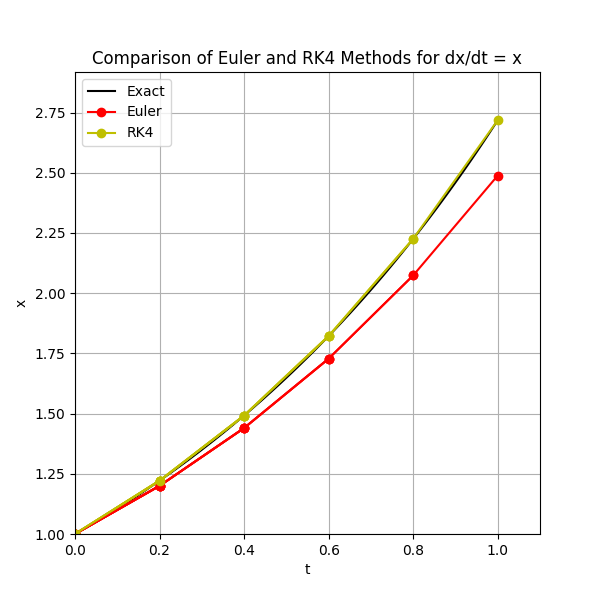

In [19]:
# Number of steps and time step
numSteps = 5
tau = 1/numSteps

# Initial values
t = np.zeros(numSteps+1)
x = np.zeros((numSteps+1, 2))
x[0,:] = 1

#-------------------------------------------------------------------------------
# Integration loop
for n in range(numSteps):
    
    # One step of Euler:
    f = rhs_exp(x[n,0])
    x[n+1,0] = x[n,0] + tau*f
    
    # One step of RK4:
    f1 = rhs_exp(x[n,1])
    f2 = rhs_exp(x[n,1] + 0.5*tau*f1)
    f3 = rhs_exp(x[n,1] + 0.5*tau*f2)
    f4 = rhs_exp(x[n,1] + tau*f3)
    x[n+1,1] = x[n,1] + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    
    # Increment time:
    t[n+1] = t[n] + tau
    
#-------------------------------------------------------------------------------
# Plot the results as an animation
%matplotlib ipympl
%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline
    
# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')

# Plot the exact solution
tRange = np.linspace(0, 1, 100)
ax.plot(tRange, np.exp(tRange), '-k', label='Exact')

# Plot the numerical solutions interactively
artists = []

for i in range(numSteps):
    
    label1 = 'Euler' if i == numSteps - 1 else None
    label2 = 'RK4' if i == numSteps - 1 else None
            
    plot1, = ax.plot(t[0:i+2], x[0:i+2,0], 'o-r', label=label1)
    plot2, = ax.plot(t[0:i+2], x[0:i+2,1], 'o-y', label=label2)
        
    artists.append([plot1, plot2])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=300, repeat=False)

ax.set_xlim([0, 1.1])
ax.set_ylim([1, np.exp(1)+0.2])
ax.set_title('Comparison of Euler and RK4 Methods for dx/dt = x')
ax.legend()
ax.grid(True)
plt.show()